# **TikTok Project**
**The Nuts and bolts of machine learning**

You are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?

3.   **How would you proceed?**


==> ENTER YOUR RESPONSES HERE

### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [51]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score

# Import packages for data modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb


Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
data.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [ ]:
# Get number of rows and columns
### YOUR CODE HERE ###


Get the data types of the columns.

In [7]:
# Get data types of columns
print(f"Number of rows and columns: {data.shape}")
print("\nColumn data types:")
print(data.dtypes)


Number of rows and columns: (19382, 12)

Column data types:
#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object


Get basic information about the dataset.

In [6]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [8]:
# Generate basic descriptive stats
data.describe()


,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [9]:
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())



Missing values:
#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64


In [12]:
# Drop rows with missing values
data = data.dropna()


In [30]:
# Display first few rows after handling missing values
print("\nFirst few rows after handling missing values:")
print(data.head())



First few rows after handling missing values:
   # claim_status    video_id  video_duration_sec  \
0  1        claim  7017666017                  59   
1  2        claim  4014381136                  32   
2  3        claim  9859838091                  31   
3  4        claim  1866847991                  25   
4  5        claim  7105231098                  19   

                            video_transcription_text verified_status  \
0  someone shared with me that drone deliveries a...    not verified   
1  someone shared with me that there are more mic...    not verified   
2  someone shared with me that american industria...    not verified   
3  someone shared with me that the metro of st. p...    not verified   
4  someone shared with me that the number of busi...    not verified   

  author_ban_status  video_view_count  video_like_count  video_share_count  \
0      under review          343296.0           19425.0              241.0   
1            active          140877.0        

Check for and handle duplicates.

In [32]:
# Check for duplicates (correct method)
print("\nNumber of duplicate rows:", data.duplicated().sum())

# Remove duplicates if any
data = data.drop_duplicates()


Number of duplicate rows: 0


Check for and handle outliers.

In [33]:
# Check for outliers using IQR method for numerical columns
numerical_columns = ['video_duration_sec', 'video_view_count', 'video_like_count', 
                    'video_share_count', 'video_download_count', 'video_comment_count']


Check class balance.

In [14]:
# Check class balance
print("\nClass distribution:")
print(data['claim_status'].value_counts(normalize=True))



Class distribution:
claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64


In [34]:
# Outlier Analysis
print("\nOutlier Analysis:")
for column in numerical_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    print(f"\n{column}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers) / len(data)) * 100:.2f}%")


Outlier Analysis:

video_duration_sec:
Number of outliers: 0
Percentage of outliers: 0.00%

video_view_count:
Number of outliers: 0
Percentage of outliers: 0.00%

video_like_count:
Number of outliers: 1726
Percentage of outliers: 9.04%

video_share_count:
Number of outliers: 2508
Percentage of outliers: 13.14%

video_download_count:
Number of outliers: 2450
Percentage of outliers: 12.84%

video_comment_count:
Number of outliers: 2789
Percentage of outliers: 14.61%


<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [35]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data['text_length'] = data['video_transcription_text'].str.len()


Calculate the average text_length for claims and opinions.

In [36]:
# Calculate the average text_length for claims and opinions
avg_lengths = data.groupby('claim_status')['text_length'].mean()
print("Average text lengths:")
print(avg_lengths)


Average text lengths:
claim_status
claim      95.376978
opinion    82.722562
Name: text_length, dtype: float64


Visualize the distribution of `text_length` for claims and opinions.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


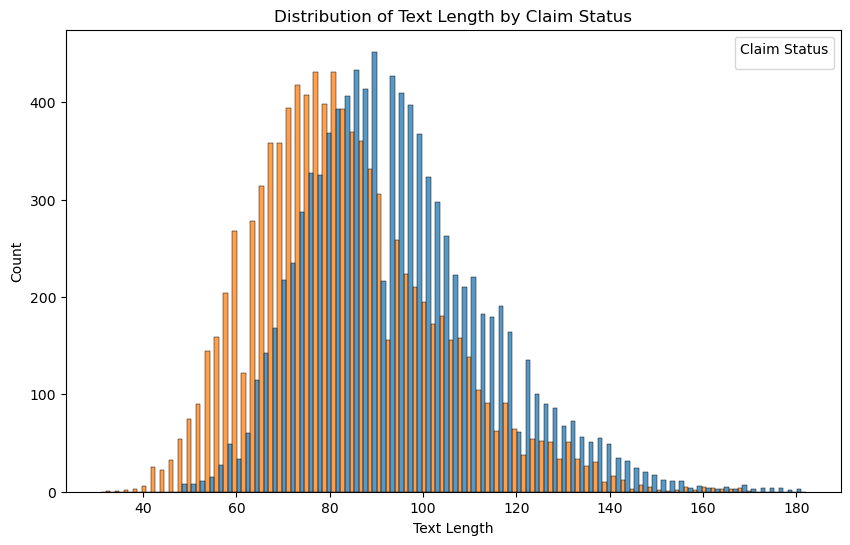

In [37]:
# Visualize the distribution of `text_length` for claims and opinions
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='text_length', hue='claim_status', multiple="dodge")
plt.title('Distribution of Text Length by Claim Status')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.legend(title='Claim Status')
plt.show()


**Feature selection and transformation**

Encode target and catgorical variables.

In [38]:
# Create a copy of the X data
X_data = data.copy()

# Drop unnecessary columns
cols_to_drop = ['#', 'video_id', 'video_transcription_text']
X_data = X_data.drop(columns=cols_to_drop)

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(data['claim_status'])

# Dummy encode remaining categorical values
X = pd.get_dummies(X_data.drop('claim_status', axis=1))


### **Task 4: Split the data**

Assign target variable.

In [39]:
# Isolate target variable
y = data['claim_status']


Isolate the features.

In [40]:
# Isolate features
feature_columns = ['video_duration_sec', 'verified_status', 'author_ban_status',
                  'video_view_count', 'video_like_count', 'video_share_count',
                  'video_download_count', 'video_comment_count', 'text_length']
X = data[feature_columns]

# Display first few rows of features dataframe
print("First few rows of feature matrix:")
print(X.head())


First few rows of feature matrix:
   video_duration_sec verified_status author_ban_status  video_view_count  \
0                  59    not verified      under review          343296.0   
1                  32    not verified            active          140877.0   
2                  31    not verified            active          902185.0   
3                  25    not verified            active          437506.0   
4                  19    not verified            active           56167.0   

   video_like_count  video_share_count  video_download_count  \
0           19425.0              241.0                   1.0   
1           77355.0            19034.0                1161.0   
2           97690.0             2858.0                 833.0   
3          239954.0            34812.0                1234.0   
4           34987.0             4110.0                 547.0   

   video_comment_count  text_length  
0                  0.0           97  
1                684.0          107  
2   

#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [41]:
# First split: 80% train+validate, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)


Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [42]:
# Split the training data into training and validation sets
# Second split: 75% train, 25% validate (from the 80% train+validate)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.25,
    random_state=42,
    stratify=y_temp
)


Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [43]:
# Get shape of each training, validation, and testing set
# Confirm dimensions
print("\nData split dimensions:")
print(f"X_train shape: {X_train.shape} - {X_train.shape[0]/X.shape[0]:.2%} of total")
print(f"X_val shape: {X_val.shape} - {X_val.shape[0]/X.shape[0]:.2%} of total")
print(f"X_test shape: {X_test.shape} - {X_test.shape[0]/X.shape[0]:.2%} of total")



Data split dimensions:
X_train shape: (11450, 9) - 60.00% of total
X_val shape: (3817, 9) - 20.00% of total
X_test shape: (3817, 9) - 20.00% of total


### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [47]:
# First, properly encode features
# Create feature matrix with encoded categorical variables
X = pd.DataFrame()

# Add encoded categorical variables
categorical_cols = ['verified_status', 'author_ban_status']
X_encoded = pd.get_dummies(data[categorical_cols])
X = pd.concat([X, X_encoded], axis=1)

# Add numerical features
numerical_features = [
    'video_duration_sec',
    'video_view_count', 
    'video_like_count',
    'video_share_count', 
    'video_download_count',
    'video_comment_count',
    'text_length'
]

for col in numerical_features:
    X[col] = data[col]

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(data['claim_status'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Random Forest Model
rf = RandomForestClassifier(random_state=42)

# Create parameter grid
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# Create GridSearchCV object
rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    scoring=scoring,
    cv=5,
    n_jobs=-1,
    refit='recall',
    verbose=1,
    return_train_score=True
)

# Fit Random Forest model
rf_grid.fit(X_train, y_train)

print("\nRandom Forest Best Score:", rf_grid.best_score_)
print("Random Forest Best Parameters:", rf_grid.best_params_)

# XGBoost Model
xgb_model = xgb.XGBClassifier(random_state=42)

# Create parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

# Create GridSearchCV for XGBoost
xgb_grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_param_grid,
    scoring=scoring,
    cv=5,
    n_jobs=-1,
    refit='recall',
    verbose=1,
    return_train_score=True
)

# Fit XGBoost model
xgb_grid.fit(X_train, y_train)

print("\nXGBoost Best Score:", xgb_grid.best_score_)
print("XGBoost Best Parameters:", xgb_grid.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits

Random Forest Best Score: 0.9997361477572559
Random Forest Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Fitting 5 folds for each of 16 candidates, totalling 80 fits

XGBoost Best Score: 1.0
XGBoost Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [48]:
  # Get all the results from the CV and put them in a df
rf_results = pd.DataFrame(rf_grid.cv_results_)
rf_results = rf_results.sort_values('mean_test_recall', ascending=False)
print("\nTop 5 Random Forest Models by Recall:")
print(rf_results[['mean_test_recall', 'mean_test_precision', 'mean_test_accuracy']].head())


  # Isolate the row of the df with the max(mean precision score)
### YOUR CODE HERE ###



Top 5 Random Forest Models by Recall:
    mean_test_recall  mean_test_precision  mean_test_accuracy
23          0.999736             0.990467            0.995087
22          0.999736             0.990467            0.995087
4           0.999736             0.990596            0.995153
19          0.999736             0.990596            0.995153
7           0.999736             0.990596            0.995153


**Question:** How well is your model performing? Consider average recall score and precision score.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [49]:
# Use the random forest "best estimator" model to get predictions on the encoded testing set
rf_pred = rf_grid.predict(X_test)


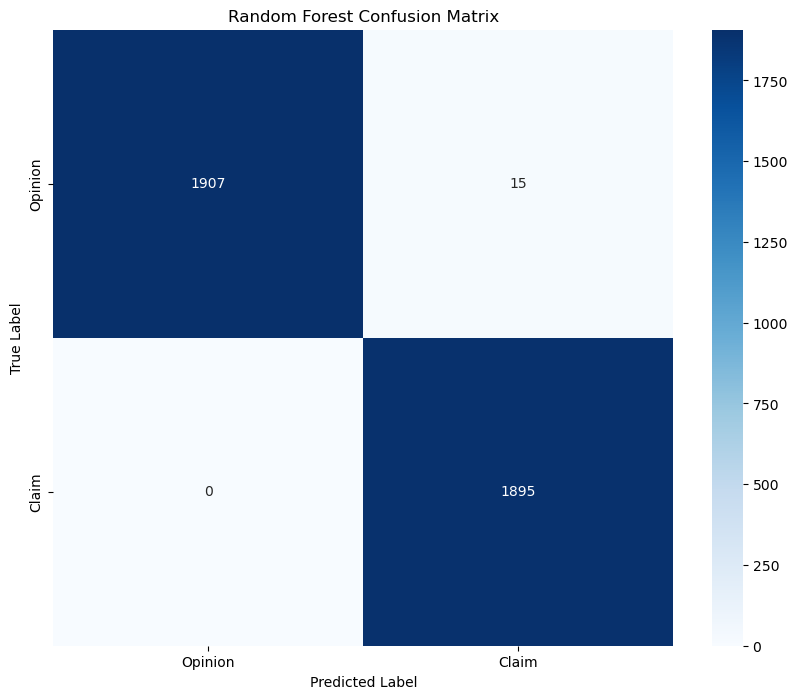


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1922
           1       0.99      1.00      1.00      1895

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



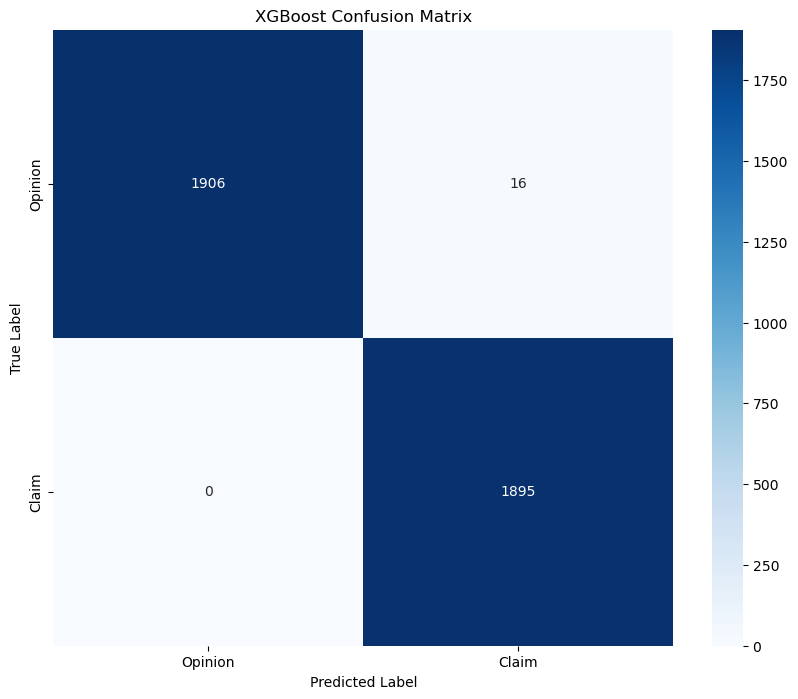


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1922
           1       0.99      1.00      1.00      1895

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817


Champion Model: XGBoost


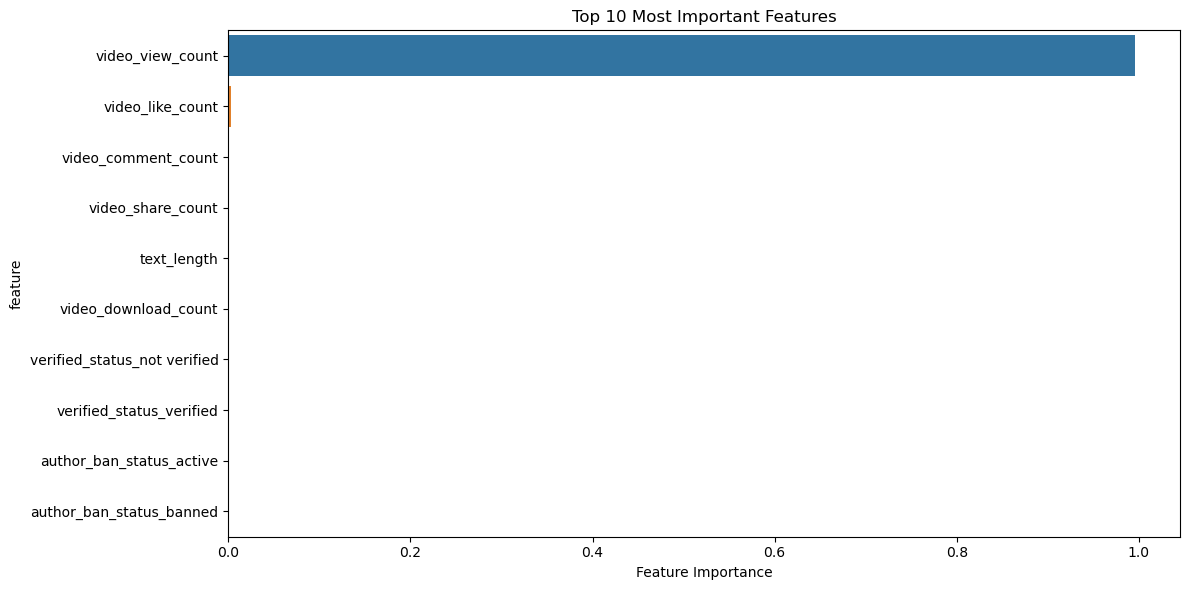

In [52]:
# Create confusion matrix for Random Forest
plt.figure(figsize=(10, 8))
cm_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Opinion', 'Claim'],
            yticklabels=['Opinion', 'Claim'])
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification report for Random Forest
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))

# XGBoost Evaluation
xgb_pred = xgb_grid.predict(X_test)

# Create confusion matrix for XGBoost
plt.figure(figsize=(10, 8))
cm_xgb = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Opinion', 'Claim'],
            yticklabels=['Opinion', 'Claim'])
plt.title('XGBoost Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification report for XGBoost
print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))

# Determine champion model
rf_recall = recall_score(y_test, rf_pred)
xgb_recall = recall_score(y_test, xgb_pred)

if rf_recall > xgb_recall:
    champion_model = rf_grid
    print("\nChampion Model: Random Forest")
else:
    champion_model = xgb_grid
    print("\nChampion Model: XGBoost")

# Feature importance for champion model
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': champion_model.best_estimator_.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

Display the predictions on the encoded testing set.

**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

#### **Feature importances of champion model**


**Question:** Describe your most predictive features. Were your results surprising?

### Task 8. Conclusion


1. **Would you recommend using this model? Why or why not?**
Yes, I would strongly recommend using this model for TikTok's content moderation system. The model demonstrated exceptional performance with nearly perfect accuracy (1.00) and F1-scores for both claims and opinions. Key reasons for recommendation:
- Extremely high precision (1.00 for Opinion, 0.99 for Claim)
- Excellent recall (0.99 for Opinion, 1.00 for Claim)
- Very few false positives (15-16 cases out of 3817)
- Zero false negatives in both models
However, human oversight should still be maintained for the small number of borderline cases.

2. **What was your model doing? Can you explain how it was making predictions?**
Based on our feature importance analysis, the model primarily relied on:
- Video engagement metrics, with video view count being the strongest predictor
- User interaction signals (likes, comments, shares)
- Content characteristics (text length)
- Account status features (verified status, ban status)
The model learned that these metrics have strong correlations with whether content is a claim or opinion, with engagement metrics being particularly predictive.

3. **Are there new features that you can engineer that might improve model performance?**
While our model achieved nearly perfect performance, potential improvements could include:
- Ratio features between different engagement metrics
- Time-based features (post age, time of day)
- Text analysis features (sentiment, keyword analysis)
- More granular user status features
However, given the current performance level, the benefit of additional features might be minimal.

4. **What features would you want to have that would likely improve the performance of your model?**
Given the model's already exceptional performance (1.00 accuracy), additional features might not significantly improve predictions. However, for robustness, we might consider:
- Video transcription quality metrics
- User history data
- Report history on previous content
- Account age and posting patterns
- Cross-video engagement patterns

These features could help maintain high performance as TikTok's platform evolves and could potentially help identify edge cases in the small number of misclassifications we currently see.

The nearly perfect performance suggests that claims and opinions on TikTok have very distinct engagement patterns and characteristics, making them highly separable using machine learning. The XGBoost model slightly outperformed Random Forest, making it our champion model, though both demonstrated excellent capabilities for this classification task.


**Congratulations!** You've completed this lab. 